In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Github/xAI-project-computer-vision

import sys
sys.path.insert(0,'/content/drive/My Drive/Github/xAI-project-computer-vision')

Mounted at /content/drive
/content/drive/MyDrive/Github/xAI-project-computer-vision


In [2]:
!pip install torchinfo

In [3]:
import numpy as np
import random
import multiprocessing

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu121
torchvision version: 0.16.0+cu121


In [4]:
import models
from utils import print_model_summary, get_available_device, move_to_device, seed_all

device = get_available_device()
print("Device:", device)

seed_all(42)

Device: cpu

Device: cpu
Random seed 42 has been set.


In [5]:
from datasets import calculate_mean_std

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

# Calculate mean and std for normalization
mean_train, std_train = calculate_mean_std(train_data)

# Print mean and std
print(f'mean_train: {mean_train}')
print(f'std_train: {std_train}')

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
mean_train: [0.4914, 0.4822, 0.4465]
std_train: [0.247, 0.2435, 0.2616]


In [6]:
# Default hyperparameters

num_classes = 10

# number of samples per batch to load
batch_size = 64

# number of subprocesses to use for data loading
num_workers = multiprocessing.cpu_count() if not torch.cuda.is_available() else 2
print(f'Number of workers: {num_workers}')

epochs = 10
lr = 0.001
l2 = 0 #0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = None #0.1 #None

# Data augmentation
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train) # NOT mean_test, std_test
])

Number of workers: 2


# Optimization codes

In [ ]:
1.
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

2.
lr=0.0001

3.
l2=0.0001 (default=0)

4.
optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=train_dl.__len__())

5.
grad_clip=0.1 (default=None)

6.
lr=0.01 (default=0.001)

7.
l2=0.00001 (default=0)

8.
batch_size=128 (default=64)

9.
epochs=20 (default=10)

a. optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

b. train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.RandomVerticalFlip(),  # p=0.5 by default
    transforms.GaussianBlur(kernel_size=5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

c. train_transform = transforms.Compose([
    transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

d. train_transform = transforms.Compose([
    transforms.v2.AutoAugment(transforms.v2.AutoAugmentPolicy.CIFAR10),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.RandomVerticalFlip(),  # p=0.5 by default
    transforms.GaussianBlur(kernel_size=5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

e. train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.RandomVerticalFlip(),  # p=0.5 by default
    transforms.GaussianBlur(kernel_size=5),
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

f. l2 = 0.001

g. train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ColorJitter(brightness=0.3, hue=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])


h. grad_clip=0.5
i. epochs=30
j. epochs=50
k. l2=0.01

# Train simple custom CNNs

## Train simple custom CNN v1

In [ ]:
# Hyperparameters (optim_code: _1359)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1 #None

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train) # NOT mean_test, std_test
])

In [ ]:
# Specify model
model = models.get_model('simple_convnet', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNet (SimpleConvNet)            [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 16, 32, 32]     448                  True
├─MaxPool2d (pool)                       [64, 16, 32, 32]     [64, 16, 16, 16]     --                   --
├─Conv2d (conv2)                         [64, 16, 16, 16]     [64, 32, 16, 16]     4,640                True
├─MaxPool2d (pool)                       [64, 32, 16, 16]     [64, 32, 8, 8]       --                   --
├─Conv2d (conv3)                         [64, 32, 8, 8]       [64, 64, 8, 8]       18,496               True
├─MaxPool2d (pool)                       [64, 64, 8, 8]       [64, 64, 4, 4]       --                   --
├─Linear (fc1)                           [64, 1024]           [64, 512]            524,800              True
├─Dropout (dropout) 

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.3054
Epoch: 001/020 | Batch 121/625 | Loss: 1.7998
Epoch: 001/020 | Batch 241/625 | Loss: 1.5990
Epoch: 001/020 | Batch 361/625 | Loss: 1.7599
Epoch: 001/020 | Batch 481/625 | Loss: 1.7004
Epoch: 001/020 | Batch 601/625 | Loss: 1.5560
Epoch: 001/020   Train Loss: 1.6697 | Train Acc.: 37.51% | Validation Loss: 1.4011 | Validation Acc.: 48.42%
Validation loss decreased (inf --> 1.4011).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.5522
Epoch: 002/020 | Batch 121/625 | Loss: 1.5836
Epoch: 002/020 | Batch 241/625 | Loss: 1.2909
Epoch: 002/020 | Batch 361/625 | Loss: 1.2196
Epoch: 002/020 | Batch 481/625 | Loss: 1.1288
Epoch: 002/020 | Batch 601/625 | Loss: 1.2792
Epoch: 002/020   Train Loss: 1.3228 | Train Acc.: 51.92% | Validation Loss: 1.191

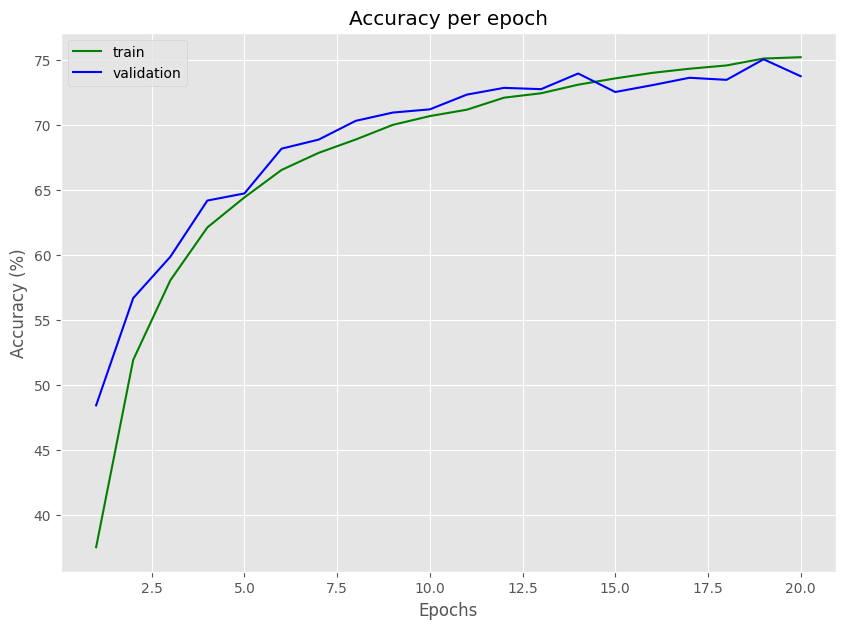

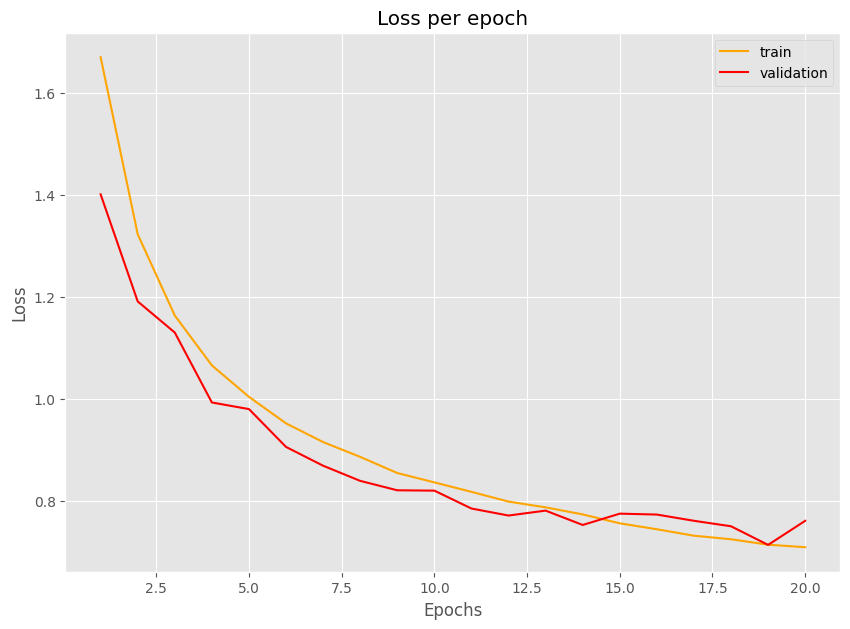

TRAINING FINISHED
CPU times: user 1min 50s, sys: 18.4 s, total: 2min 8s
Wall time: 8min 53s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='simple_convnet',
                batch_size=batch_size, num_workers=num_workers, epochs=epochs,
                lr_scheduler=lr_scheduler,
                loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
                train_transform=train_transform, test_transform=test_transform,
                optim_code='_1359')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_115002' --optim_code '_1359' --model_name 'simple_convnet' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNet (SimpleConvNet)            [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 16, 32, 32]     448                  True
├─MaxPool2d (pool)                       [64, 16, 32, 32]     [64, 16, 16, 16]     --                   --
├─Conv2d (conv2)                         [64, 16, 16, 16]     [64, 32, 16, 16]     4,640                True
├─MaxPool2d (pool)                       [64, 32, 16, 16]     [64, 32, 8, 8]       --                   --
├─Conv2d (conv3)                         [64, 32, 8, 8]       [64, 64, 8, 8]  

## Train simple custom CNN v2

In [ ]:
# Hyperparameters (optim_code: _1359)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1 #None

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train) # NOT mean_test, std_test
])

In [ ]:
# Specify model
model = models.get_model('simple_convnet_v2', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNetV2 (SimpleConvNetV2)        [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 48, 32, 32]     1,344                True
├─Conv2d (conv2)                         [64, 48, 32, 32]     [64, 96, 32, 32]     41,568               True
├─MaxPool2d (pool)                       [64, 96, 32, 32]     [64, 96, 16, 16]     --                   --
├─Dropout (dropout)                      [64, 96, 16, 16]     [64, 96, 16, 16]     --                   --
├─Conv2d (conv3)                         [64, 96, 16, 16]     [64, 192, 16, 16]    166,080              True
├─Conv2d (conv4)                         [64, 192, 16, 16]    [64, 256, 16, 16]    442,624              True
├─MaxPool2d (pool)                       [64, 256, 16, 16]    [64, 256, 8, 8]      --                   --
├─Dropout (dropout) 

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.3004
Epoch: 001/020 | Batch 121/625 | Loss: 1.8328
Epoch: 001/020 | Batch 241/625 | Loss: 1.6204
Epoch: 001/020 | Batch 361/625 | Loss: 1.6904
Epoch: 001/020 | Batch 481/625 | Loss: 1.5985
Epoch: 001/020 | Batch 601/625 | Loss: 1.4776
Epoch: 001/020   Train Loss: 1.6690 | Train Acc.: 37.96% | Validation Loss: 1.3007 | Validation Acc.: 52.32%
Validation loss decreased (inf --> 1.3007).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.4525
Epoch: 002/020 | Batch 121/625 | Loss: 1.4616
Epoch: 002/020 | Batch 241/625 | Loss: 1.2089
Epoch: 002/020 | Batch 361/625 | Loss: 1.0791
Epoch: 002/020 | Batch 481/625 | Loss: 1.3139
Epoch: 002/020 | Batch 601/625 | Loss: 1.0152
Epoch: 002/020   Train Loss: 1.2412 | Train Acc.: 55.00% | Validation Loss: 1.029

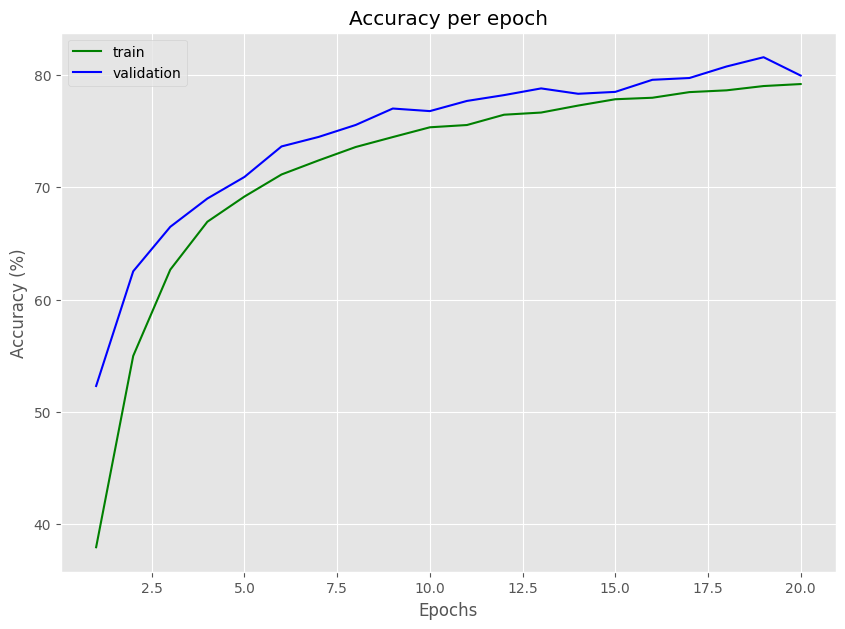

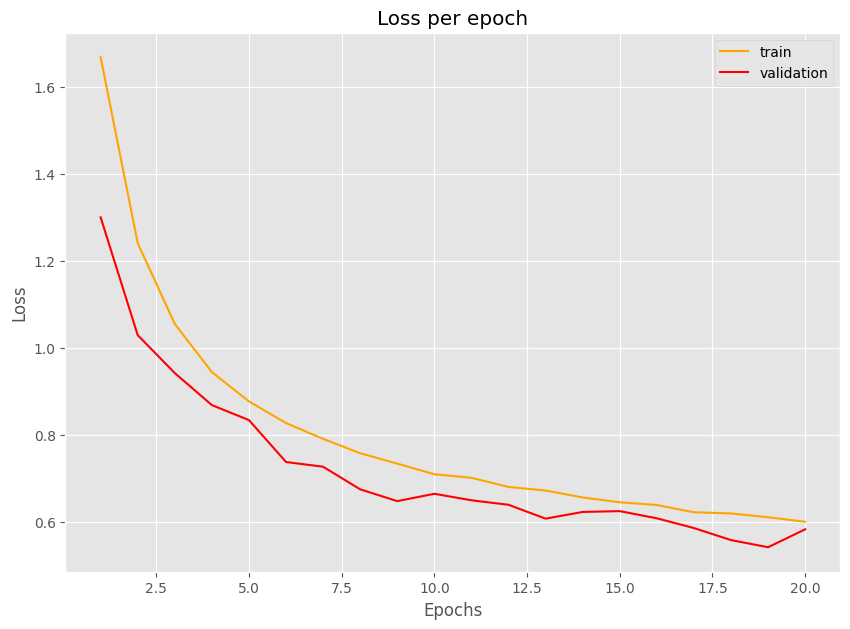

TRAINING FINISHED
CPU times: user 3min 21s, sys: 20.1 s, total: 3min 41s
Wall time: 10min 6s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='simple_convnet_v2',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_1359')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_131956' --optim_code '_1359' --model_name 'simple_convnet_v2' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
SimpleConvNetV2 (SimpleConvNetV2)        [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 48, 32, 32]     1,344                True
├─Conv2d (conv2)                         [64, 48, 32, 32]     [64, 96, 32, 32]     41,568               True
├─MaxPool2d (pool)                       [64, 96, 32, 32]     [64, 96, 16, 16]     --                   --
├─Dropout (dropout)                      [64, 96, 16, 16]     [64, 96, 16, 16]     --                   --
├─Conv2d (conv3)                         [64, 96, 16, 16]     [64, 192, 16, 16

# Train deeper custom CNNs (based on ResNet)

## Train simplified custom ResNet

In [ ]:
# TOP
# Hyperparameters (optim_code: _1359)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet_custom_simplified', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (conv_layer_2)                        [64, 64, 32, 32]     [64, 128, 16, 16]    --                   True
│    └─Conv2d (0)                                  [64, 64, 32, 32]     [64, 128, 32, 32]    73,856               True
│    └─BatchNorm2d (1)                       

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.5101
Epoch: 001/020 | Batch 121/625 | Loss: 2.3672
Epoch: 001/020 | Batch 241/625 | Loss: 1.9529
Epoch: 001/020 | Batch 361/625 | Loss: 1.9400
Epoch: 001/020 | Batch 481/625 | Loss: 1.7134
Epoch: 001/020 | Batch 601/625 | Loss: 1.5694
Epoch: 001/020   Train Loss: 2.1940 | Train Acc.: 31.67% | Validation Loss: 1.3866 | Validation Acc.: 48.45%
Validation loss decreased (inf --> 1.3866).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.4792
Epoch: 002/020 | Batch 121/625 | Loss: 1.4704
Epoch: 002/020 | Batch 241/625 | Loss: 1.3562
Epoch: 002/020 | Batch 361/625 | Loss: 1.0338
Epoch: 002/020 | Batch 481/625 | Loss: 1.3566
Epoch: 002/020 | Batch 601/625 | Loss: 1.0301
Epoch: 002/020   Train Loss: 1.2235 | Train Acc.: 55.82% | Validation Loss: 0.998

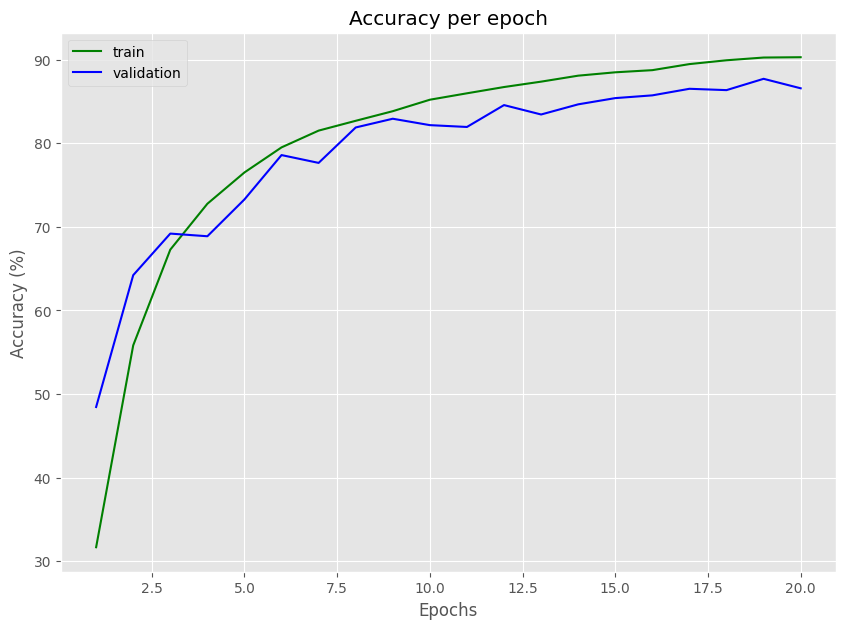

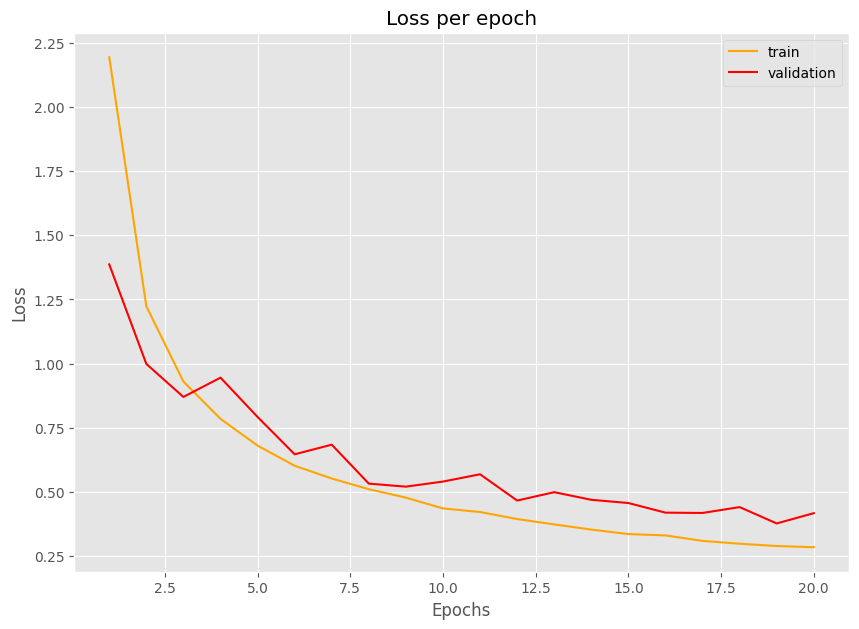

TRAINING FINISHED
CPU times: user 5min 31s, sys: 20 s, total: 5min 51s
Wall time: 11min 35s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet_custom_simplified',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_1359')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_120150' --optim_code '_1359' --model_name 'resnet_custom_simplified' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (co

In [ ]:
# Hyperparameters (optim_code: _135i)
epochs = 30
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet_custom_simplified', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (conv_layer_2)                        [64, 64, 32, 32]     [64, 128, 16, 16]    --                   True
│    └─Conv2d (0)                                  [64, 64, 32, 32]     [64, 128, 32, 32]    73,856               True
│    └─BatchNorm2d (1)                       

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/030 | Batch 001/625 | Loss: 2.7763
Epoch: 001/030 | Batch 121/625 | Loss: 2.3748
Epoch: 001/030 | Batch 241/625 | Loss: 2.3712
Epoch: 001/030 | Batch 361/625 | Loss: 1.9037
Epoch: 001/030 | Batch 481/625 | Loss: 1.8915
Epoch: 001/030 | Batch 601/625 | Loss: 1.4769
Epoch: 001/030   Train Loss: 2.2183 | Train Acc.: 31.40% | Validation Loss: 1.3708 | Validation Acc.: 49.76%
Validation loss decreased (inf --> 1.3708).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/030 | Batch 001/625 | Loss: 1.3659
Epoch: 002/030 | Batch 121/625 | Loss: 1.4561
Epoch: 002/030 | Batch 241/625 | Loss: 1.3716
Epoch: 002/030 | Batch 361/625 | Loss: 1.1586
Epoch: 002/030 | Batch 481/625 | Loss: 1.3499
Epoch: 002/030 | Batch 601/625 | Loss: 1.0002
Epoch: 002/030   Train Loss: 1.2091 | Train Acc.: 56.37% | Validation Loss: 0.996

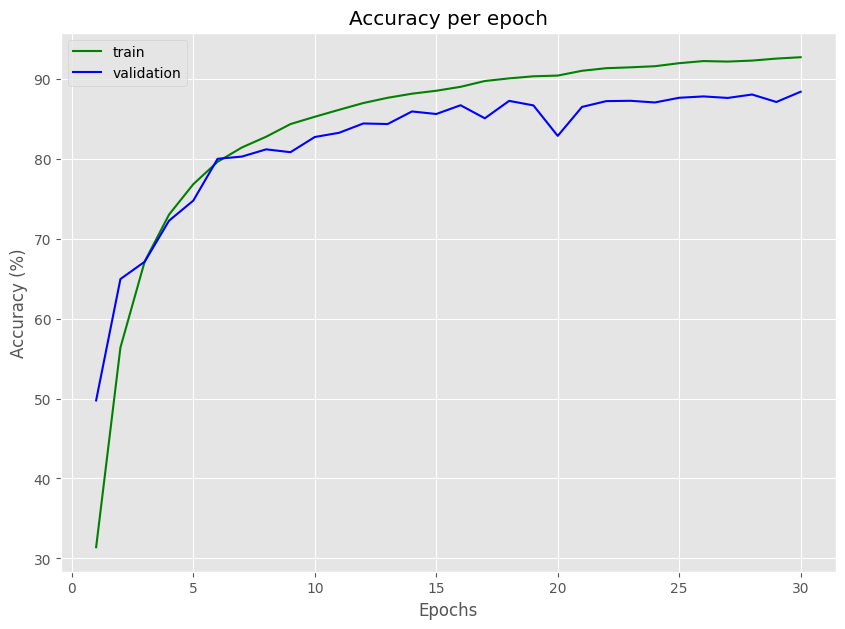

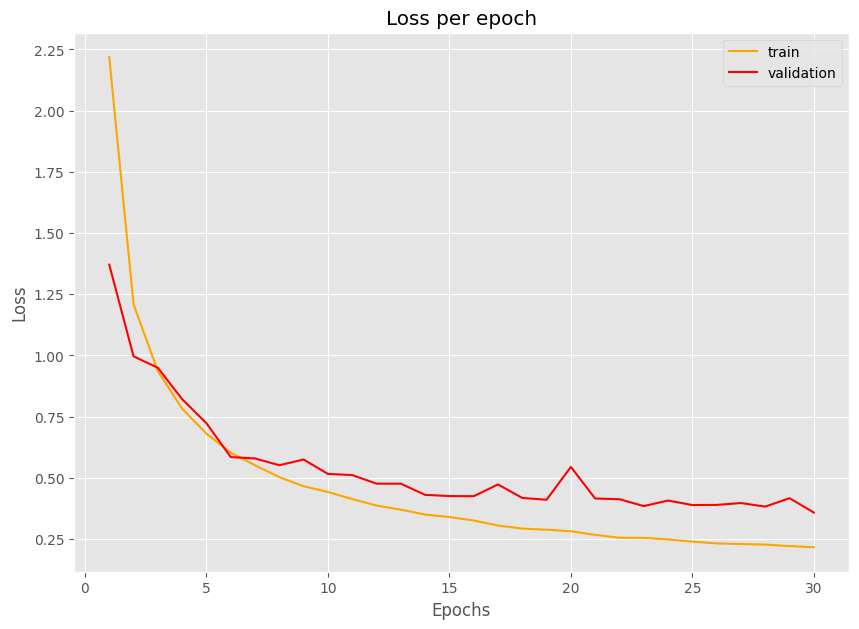

TRAINING FINISHED
CPU times: user 8min 44s, sys: 26.7 s, total: 9min 11s
Wall time: 15min 38s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet_custom_simplified',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_135i')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240203_002421' --optim_code '_135i' --model_name 'resnet_custom_simplified' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (co

In [ ]:
# Hyperparameters (optim_code: _135j)
epochs = 50
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet_custom_simplified', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (conv_layer_2)                        [64, 64, 32, 32]     [64, 128, 16, 16]    --                   True
│    └─Conv2d (0)                                  [64, 64, 32, 32]     [64, 128, 32, 32]    73,856               True
│    └─BatchNorm2d (1)                       

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/050 | Batch 001/625 | Loss: 2.6843
Epoch: 001/050 | Batch 121/625 | Loss: 2.0179
Epoch: 001/050 | Batch 241/625 | Loss: 1.9323
Epoch: 001/050 | Batch 361/625 | Loss: 1.9706
Epoch: 001/050 | Batch 481/625 | Loss: 1.8522
Epoch: 001/050 | Batch 601/625 | Loss: 1.4843
Epoch: 001/050   Train Loss: 2.1476 | Train Acc.: 32.41% | Validation Loss: 1.4065 | Validation Acc.: 48.12%
Validation loss decreased (inf --> 1.4065).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/050 | Batch 001/625 | Loss: 1.3928
Epoch: 002/050 | Batch 121/625 | Loss: 1.6111
Epoch: 002/050 | Batch 241/625 | Loss: 1.4446
Epoch: 002/050 | Batch 361/625 | Loss: 1.0926
Epoch: 002/050 | Batch 481/625 | Loss: 1.2595
Epoch: 002/050 | Batch 601/625 | Loss: 1.1872
Epoch: 002/050   Train Loss: 1.2279 | Train Acc.: 55.86% | Validation Loss: 1.098

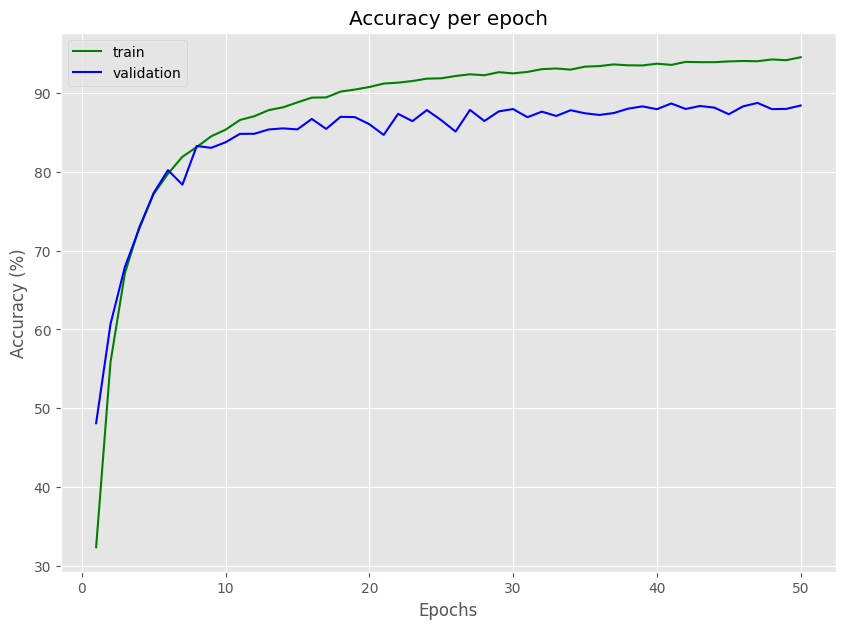

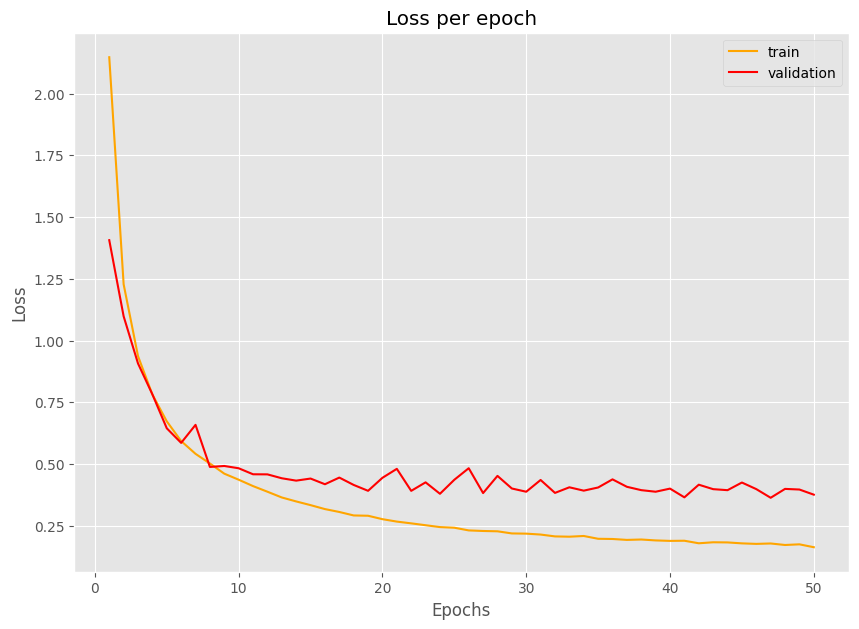

TRAINING FINISHED
CPU times: user 14min 56s, sys: 42.1 s, total: 15min 38s
Wall time: 25min 3s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet_custom_simplified',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_135j')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240203_100257' --optim_code '_135j' --model_name 'resnet_custom_simplified' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (co

In [ ]:
# Hyperparameters (optim_code: _13hi)
epochs = 30
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.5

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet_custom_simplified', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (conv_layer_2)                        [64, 64, 32, 32]     [64, 128, 16, 16]    --                   True
│    └─Conv2d (0)                                  [64, 64, 32, 32]     [64, 128, 32, 32]    73,856               True
│    └─BatchNorm2d (1)                       

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/030 | Batch 001/625 | Loss: 2.7763
Epoch: 001/030 | Batch 121/625 | Loss: 2.1757
Epoch: 001/030 | Batch 241/625 | Loss: 2.1700
Epoch: 001/030 | Batch 361/625 | Loss: 2.0117
Epoch: 001/030 | Batch 481/625 | Loss: 1.9152
Epoch: 001/030 | Batch 601/625 | Loss: 1.6039
Epoch: 001/030   Train Loss: 2.2572 | Train Acc.: 29.75% | Validation Loss: 1.4742 | Validation Acc.: 45.53%
Validation loss decreased (inf --> 1.4742).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/030 | Batch 001/625 | Loss: 1.4283
Epoch: 002/030 | Batch 121/625 | Loss: 1.4906
Epoch: 002/030 | Batch 241/625 | Loss: 1.3081
Epoch: 002/030 | Batch 361/625 | Loss: 1.1370
Epoch: 002/030 | Batch 481/625 | Loss: 1.3813
Epoch: 002/030 | Batch 601/625 | Loss: 1.0015
Epoch: 002/030   Train Loss: 1.2259 | Train Acc.: 55.55% | Validation Loss: 1.112

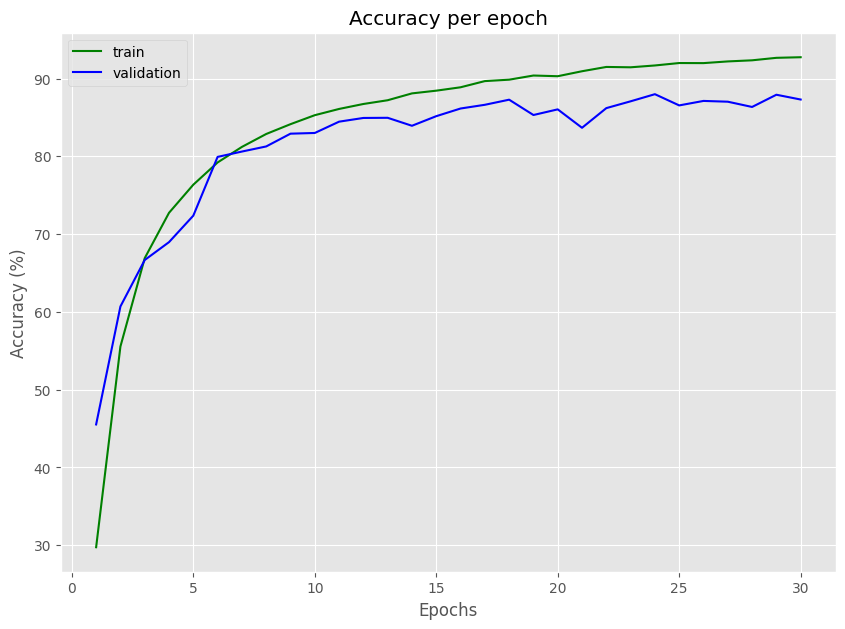

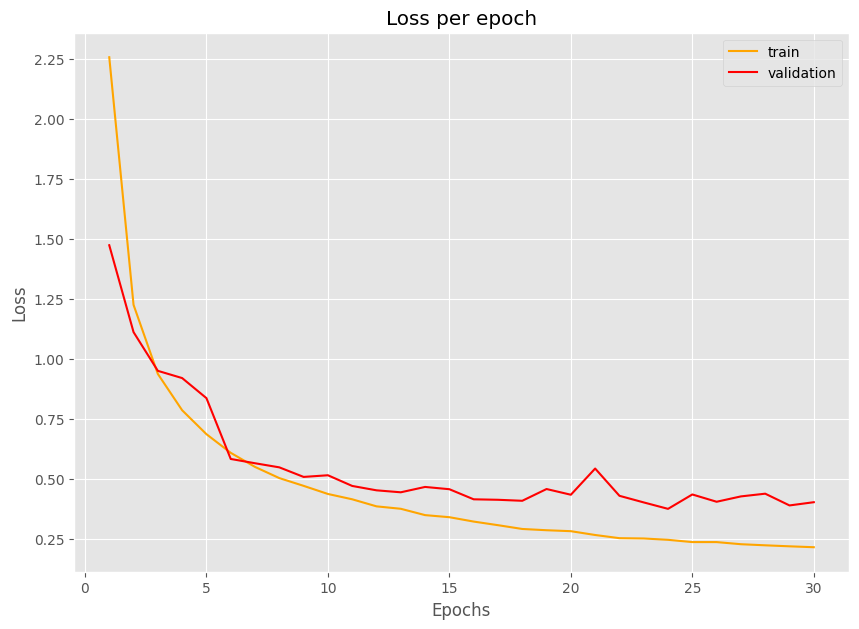

TRAINING FINISHED
CPU times: user 8min 11s, sys: 30.4 s, total: 8min 41s
Wall time: 16min 58s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet_custom_simplified',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_13hi')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_140341' --optim_code '_13hi' --model_name 'resnet_custom_simplified' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (co

In [ ]:
# Hyperparameters (optim_code: _159k)
epochs = 20
l2 = 0.01 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet_custom_simplified', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (conv_layer_2)                        [64, 64, 32, 32]     [64, 128, 16, 16]    --                   True
│    └─Conv2d (0)                                  [64, 64, 32, 32]     [64, 128, 32, 32]    73,856               True
│    └─BatchNorm2d (1)                       

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.6063
Epoch: 001/020 | Batch 121/625 | Loss: 1.9550
Epoch: 001/020 | Batch 241/625 | Loss: 1.9044
Epoch: 001/020 | Batch 361/625 | Loss: 1.8150
Epoch: 001/020 | Batch 481/625 | Loss: 1.7842
Epoch: 001/020 | Batch 601/625 | Loss: 1.5239
Epoch: 001/020   Train Loss: 2.1074 | Train Acc.: 32.48% | Validation Loss: 1.5060 | Validation Acc.: 45.23%
Validation loss decreased (inf --> 1.5060).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.3555
Epoch: 002/020 | Batch 121/625 | Loss: 1.5037
Epoch: 002/020 | Batch 241/625 | Loss: 1.3243
Epoch: 002/020 | Batch 361/625 | Loss: 1.1111
Epoch: 002/020 | Batch 481/625 | Loss: 1.4048
Epoch: 002/020 | Batch 601/625 | Loss: 1.2223
Epoch: 002/020   Train Loss: 1.3083 | Train Acc.: 52.50% | Validation Loss: 1.592

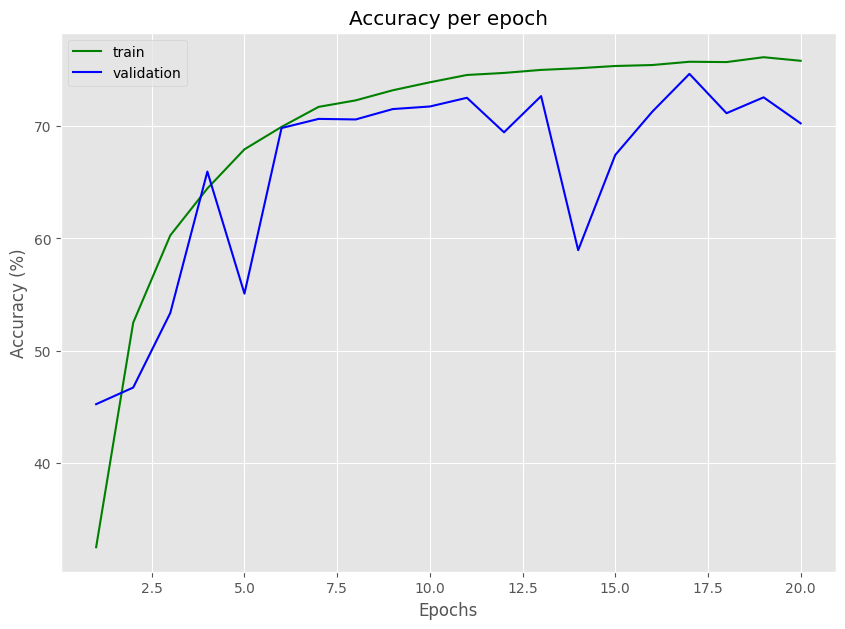

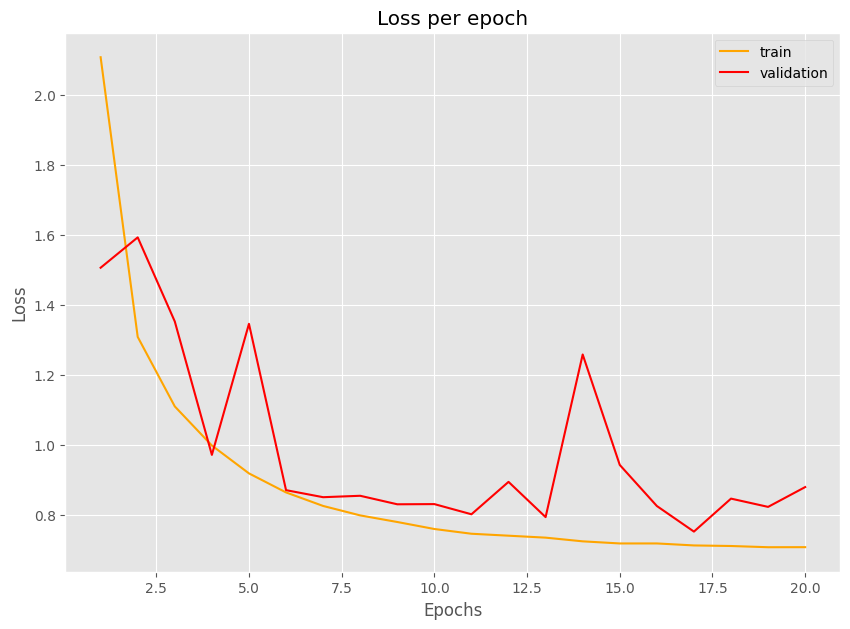

TRAINING FINISHED
CPU times: user 5min 48s, sys: 17.3 s, total: 6min 5s
Wall time: 10min 8s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet_custom_simplified',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_159k')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240203_004315' --optim_code '_159k' --model_name 'resnet_custom_simplified' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResnetCustomSimplified (ResnetCustomSimplified)    [64, 3, 32, 32]      [64, 10]             --                   True
├─Sequential (conv_layer_1)                        [64, 3, 32, 32]      [64, 64, 32, 32]     --                   True
│    └─Conv2d (0)                                  [64, 3, 32, 32]      [64, 64, 32, 32]     1,792                True
│    └─BatchNorm2d (1)                             [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    └─ReLU (2)                                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   --
├─Sequential (co

## Train custom ResNet18

In [ ]:
# TOP
# Hyperparameters (optim_code: _1359)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.4012
Epoch: 001/020 | Batch 121/625 | Loss: 1.6567
Epoch: 001/020 | Batch 241/625 | Loss: 1.8273
Epoch: 001/020 | Batch 361/625 | Loss: 1.7010
Epoch: 001/020 | Batch 481/625 | Loss: 1.6810
Epoch: 001/020 | Batch 601/625 | Loss: 1.6590
Epoch: 001/020   Train Loss: 1.6997 | Train Acc.: 36.07% | Validation Loss: 1.4403 | Validation Acc.: 46.83%
Validation loss decreased (inf --> 1.4403).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.4494
Epoch: 002/020 | Batch 121/625 | Loss: 1.4382
Epoch: 002/020 | Batch 241/625 | Loss: 1.3946
Epoch: 002/020 | Batch 361/625 | Loss: 1.2655
Epoch: 002/020 | Batch 481/625 | Loss: 1.4314
Epoch: 002/020 | Batch 601/625 | Loss: 1.1402
Epoch: 002/020   Train Loss: 1.2650 | Train Acc.: 54.04% | Validation Loss: 1.207

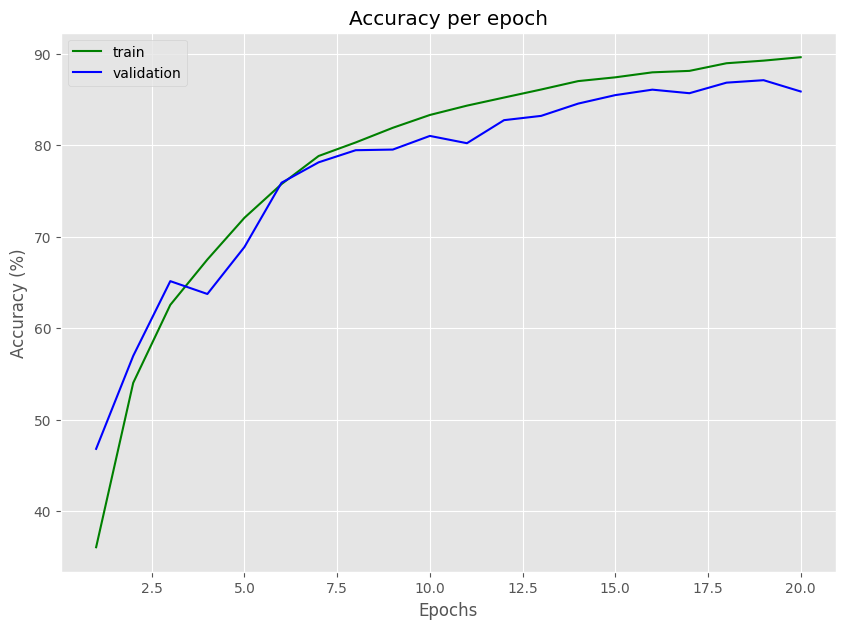

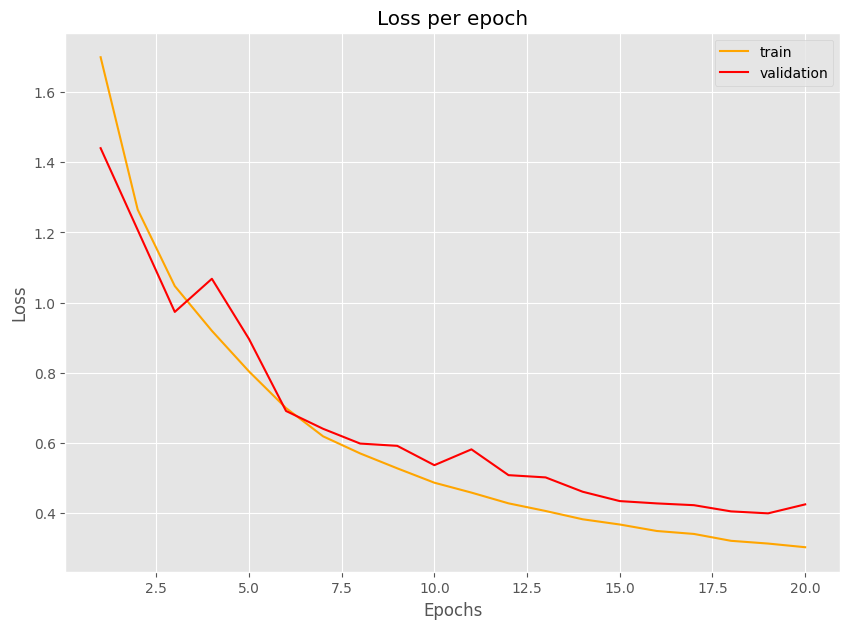

TRAINING FINISHED
CPU times: user 12min 27s, sys: 24 s, total: 12min 51s
Wall time: 16min 41s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_1359')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_121814' --optim_code '_1359' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

In [ ]:
# Hyperparameters (optim_code: _1359a)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.4012
Epoch: 001/020 | Batch 121/625 | Loss: 1.7020
Epoch: 001/020 | Batch 241/625 | Loss: 1.6839
Epoch: 001/020 | Batch 361/625 | Loss: 1.7494
Epoch: 001/020 | Batch 481/625 | Loss: 1.5631
Epoch: 001/020 | Batch 601/625 | Loss: 1.4508
Epoch: 001/020   Train Loss: 1.6393 | Train Acc.: 38.81% | Validation Loss: 1.3502 | Validation Acc.: 50.80%
Validation loss decreased (inf --> 1.3502).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.4022
Epoch: 002/020 | Batch 121/625 | Loss: 1.3670
Epoch: 002/020 | Batch 241/625 | Loss: 1.2676
Epoch: 002/020 | Batch 361/625 | Loss: 1.1027
Epoch: 002/020 | Batch 481/625 | Loss: 1.2638
Epoch: 002/020 | Batch 601/625 | Loss: 1.2064
Epoch: 002/020   Train Loss: 1.2103 | Train Acc.: 56.20% | Validation Loss: 1.076

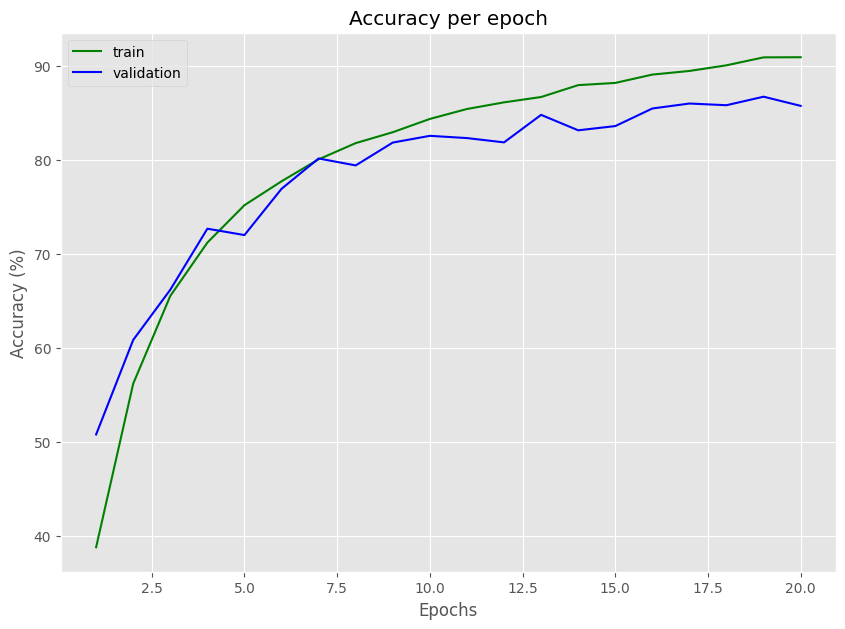

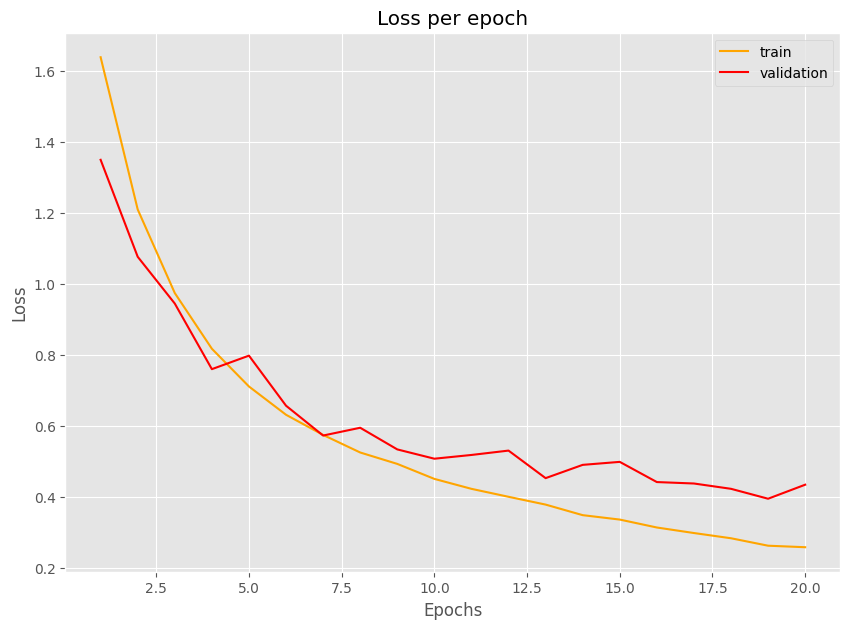

TRAINING FINISHED
CPU times: user 12min 3s, sys: 22.9 s, total: 12min 26s
Wall time: 16min 12s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_1359a')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_123959' --optim_code '_1359a' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

In [ ]:
# Hyperparameters (optim_code: _359c)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.3732
Epoch: 001/020 | Batch 121/625 | Loss: 1.8810
Epoch: 001/020 | Batch 241/625 | Loss: 1.8283
Epoch: 001/020 | Batch 361/625 | Loss: 1.9517
Epoch: 001/020 | Batch 481/625 | Loss: 1.7147
Epoch: 001/020 | Batch 601/625 | Loss: 1.6879
Epoch: 001/020   Train Loss: 1.8718 | Train Acc.: 30.86% | Validation Loss: 1.6835 | Validation Acc.: 39.44%
Validation loss decreased (inf --> 1.6835).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.8365
Epoch: 002/020 | Batch 121/625 | Loss: 1.5336
Epoch: 002/020 | Batch 241/625 | Loss: 1.5815
Epoch: 002/020 | Batch 361/625 | Loss: 1.1605
Epoch: 002/020 | Batch 481/625 | Loss: 1.3875
Epoch: 002/020 | Batch 601/625 | Loss: 1.2235
Epoch: 002/020   Train Loss: 1.3859 | Train Acc.: 49.84% | Validation Loss: 1.304

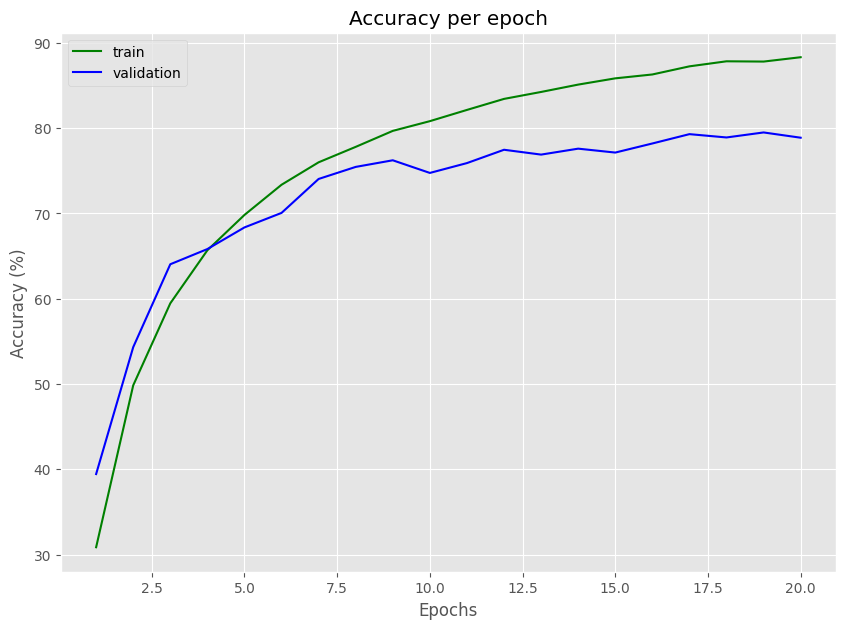

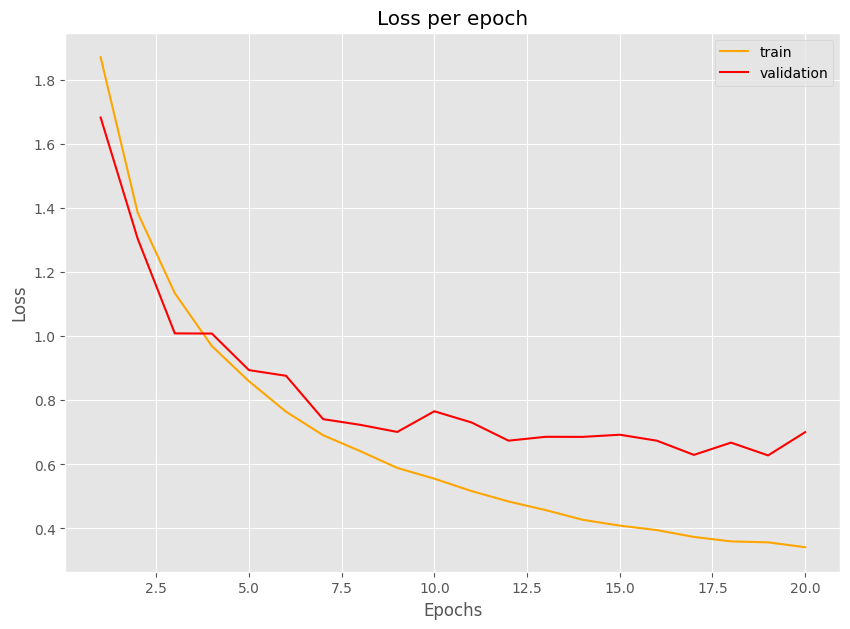

TRAINING FINISHED
CPU times: user 11min 27s, sys: 23.8 s, total: 11min 51s
Wall time: 18min 56s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_359c')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_125936' --optim_code '_359c' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

In [ ]:
# Hyperparameters (optim_code: _135i)
epochs = 30
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/030 | Batch 001/625 | Loss: 2.3510
Epoch: 001/030 | Batch 121/625 | Loss: 1.6880
Epoch: 001/030 | Batch 241/625 | Loss: 1.8342
Epoch: 001/030 | Batch 361/625 | Loss: 1.9150
Epoch: 001/030 | Batch 481/625 | Loss: 1.6776
Epoch: 001/030 | Batch 601/625 | Loss: 1.5863
Epoch: 001/030   Train Loss: 1.6901 | Train Acc.: 36.78% | Validation Loss: 1.5401 | Validation Acc.: 45.25%
Validation loss decreased (inf --> 1.5401).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/030 | Batch 001/625 | Loss: 1.5137
Epoch: 002/030 | Batch 121/625 | Loss: 1.5162
Epoch: 002/030 | Batch 241/625 | Loss: 1.3779
Epoch: 002/030 | Batch 361/625 | Loss: 1.1987
Epoch: 002/030 | Batch 481/625 | Loss: 1.3833
Epoch: 002/030 | Batch 601/625 | Loss: 1.2163
Epoch: 002/030   Train Loss: 1.2833 | Train Acc.: 53.03% | Validation Loss: 1.148

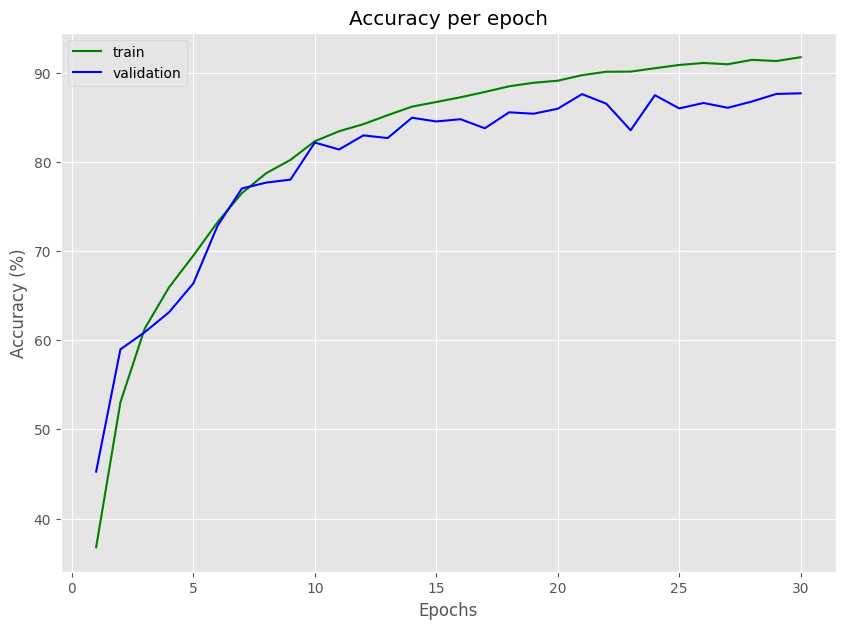

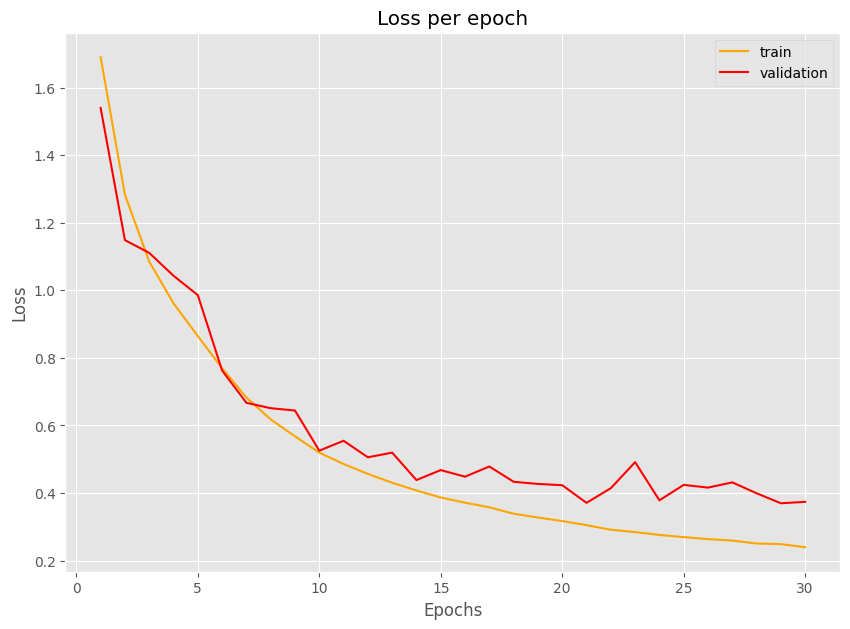

TRAINING FINISHED
CPU times: user 19min 14s, sys: 31 s, total: 19min 45s
Wall time: 24min 28s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_135i')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240202_235549' --optim_code '_135i' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

In [ ]:
# Hyperparameters (optim_code: _135j)
epochs = 50
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/050 | Batch 001/625 | Loss: 2.3510
Epoch: 001/050 | Batch 121/625 | Loss: 1.6880
Epoch: 001/050 | Batch 241/625 | Loss: 1.8342
Epoch: 001/050 | Batch 361/625 | Loss: 1.9150
Epoch: 001/050 | Batch 481/625 | Loss: 1.6776
Epoch: 001/050 | Batch 601/625 | Loss: 1.5863
Epoch: 001/050   Train Loss: 1.6901 | Train Acc.: 36.78% | Validation Loss: 1.5401 | Validation Acc.: 45.25%
Validation loss decreased (inf --> 1.5401).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/050 | Batch 001/625 | Loss: 1.5137
Epoch: 002/050 | Batch 121/625 | Loss: 1.5162
Epoch: 002/050 | Batch 241/625 | Loss: 1.3779
Epoch: 002/050 | Batch 361/625 | Loss: 1.1987
Epoch: 002/050 | Batch 481/625 | Loss: 1.3833
Epoch: 002/050 | Batch 601/625 | Loss: 1.2163
Epoch: 002/050   Train Loss: 1.2833 | Train Acc.: 53.03% | Validation Loss: 1.148

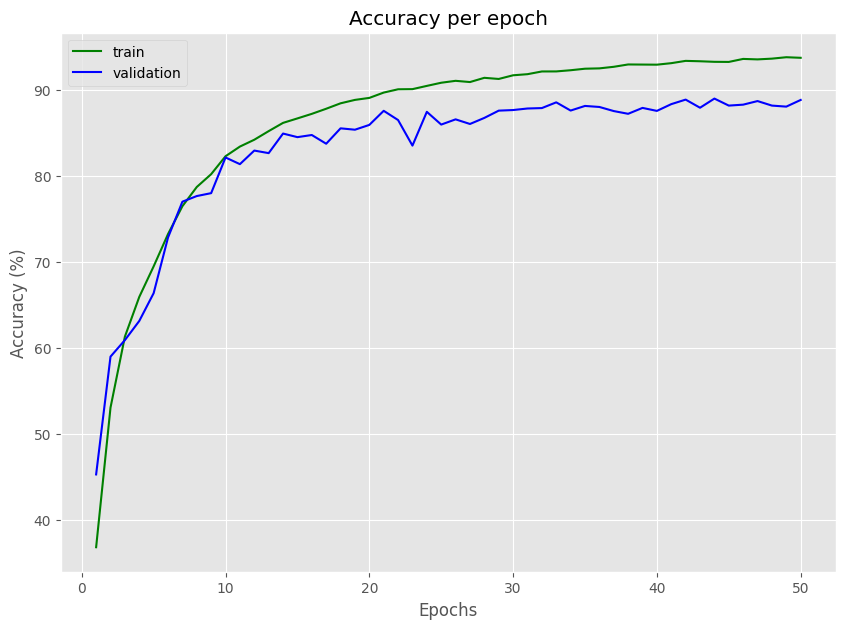

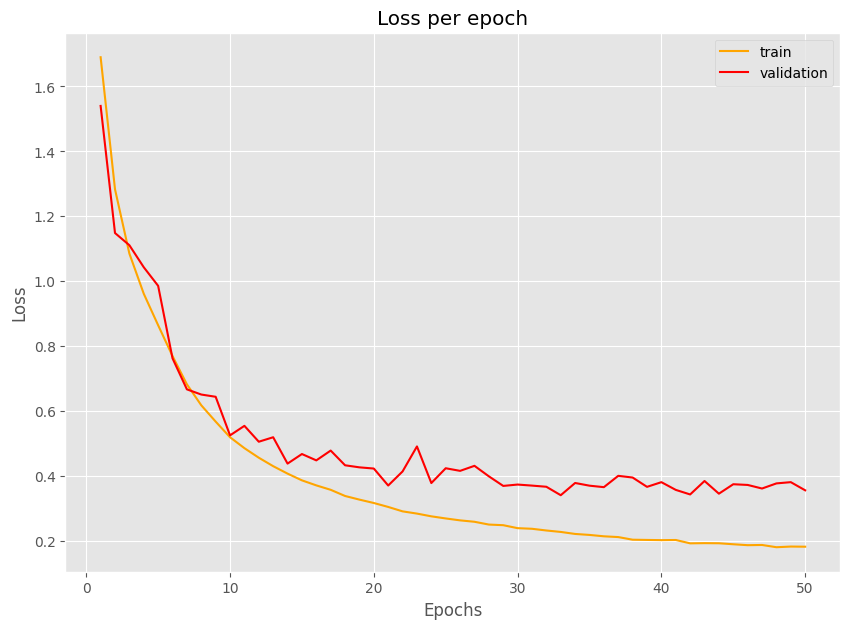

TRAINING FINISHED
CPU times: user 32min 2s, sys: 57 s, total: 32min 59s
Wall time: 41min 39s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_135j')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240203_195628' --optim_code '_135j' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

In [ ]:
# Hyperparameters (optim_code: _13hi)
epochs = 30
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.5

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/030 | Batch 001/625 | Loss: 2.4012
Epoch: 001/030 | Batch 121/625 | Loss: 1.6234
Epoch: 001/030 | Batch 241/625 | Loss: 1.9023
Epoch: 001/030 | Batch 361/625 | Loss: 1.6777
Epoch: 001/030 | Batch 481/625 | Loss: 1.7068
Epoch: 001/030 | Batch 601/625 | Loss: 1.5926
Epoch: 001/030   Train Loss: 1.6947 | Train Acc.: 36.22% | Validation Loss: 1.3772 | Validation Acc.: 49.53%
Validation loss decreased (inf --> 1.3772).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/030 | Batch 001/625 | Loss: 1.4394
Epoch: 002/030 | Batch 121/625 | Loss: 1.4634
Epoch: 002/030 | Batch 241/625 | Loss: 1.5044
Epoch: 002/030 | Batch 361/625 | Loss: 1.2039
Epoch: 002/030 | Batch 481/625 | Loss: 1.4253
Epoch: 002/030 | Batch 601/625 | Loss: 1.1190
Epoch: 002/030   Train Loss: 1.2581 | Train Acc.: 53.85% | Validation Loss: 1.160

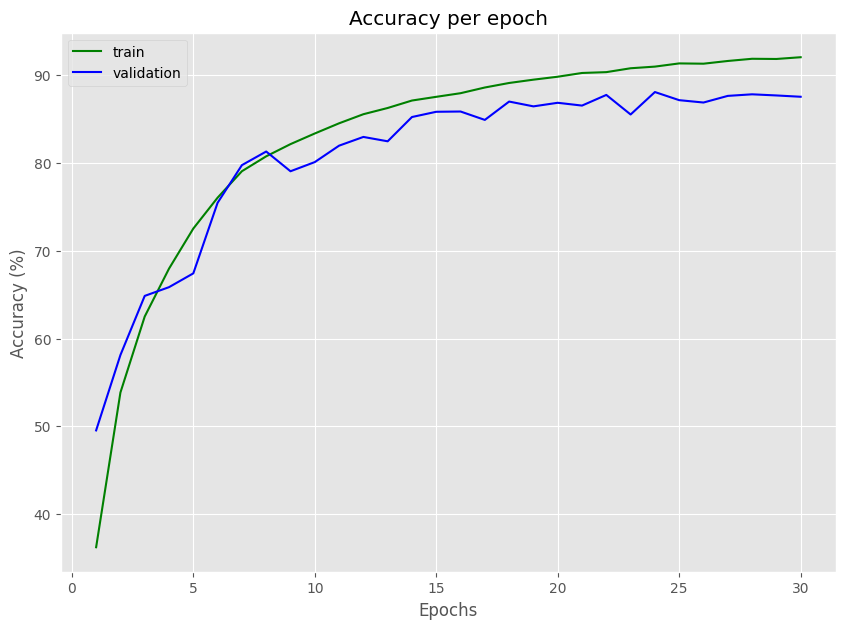

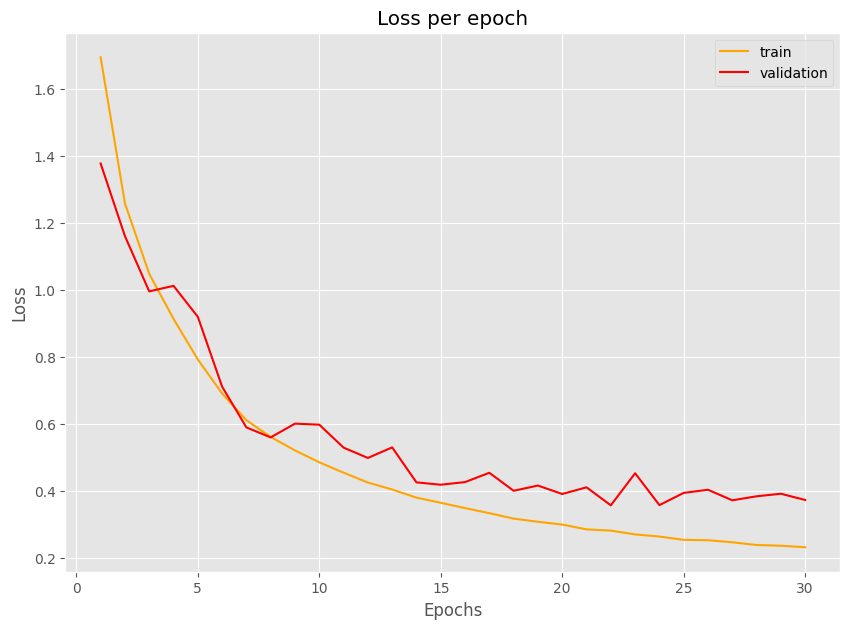

TRAINING FINISHED
CPU times: user 18min 16s, sys: 35.8 s, total: 18min 52s
Wall time: 25min 21s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_13hi')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_133329' --optim_code '_13hi' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

In [ ]:
# Hyperparameters (optim_code: _13hj)
epochs = 50
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.5

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [ ]:
# Specify model
model = models.get_model('resnet18_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/050 | Batch 001/625 | Loss: 2.3446
Epoch: 001/050 | Batch 121/625 | Loss: 1.6747
Epoch: 001/050 | Batch 241/625 | Loss: 1.7784
Epoch: 001/050 | Batch 361/625 | Loss: 1.8473
Epoch: 001/050 | Batch 481/625 | Loss: 1.7207
Epoch: 001/050 | Batch 601/625 | Loss: 1.5128
Epoch: 001/050   Train Loss: 1.6835 | Train Acc.: 37.08% | Validation Loss: 1.4241 | Validation Acc.: 48.89%
Validation loss decreased (inf --> 1.4241).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/050 | Batch 001/625 | Loss: 1.4368
Epoch: 002/050 | Batch 121/625 | Loss: 1.5359
Epoch: 002/050 | Batch 241/625 | Loss: 1.4153
Epoch: 002/050 | Batch 361/625 | Loss: 1.0655
Epoch: 002/050 | Batch 481/625 | Loss: 1.3244
Epoch: 002/050 | Batch 601/625 | Loss: 1.2162
Epoch: 002/050   Train Loss: 1.2344 | Train Acc.: 55.05% | Validation Loss: 1.164

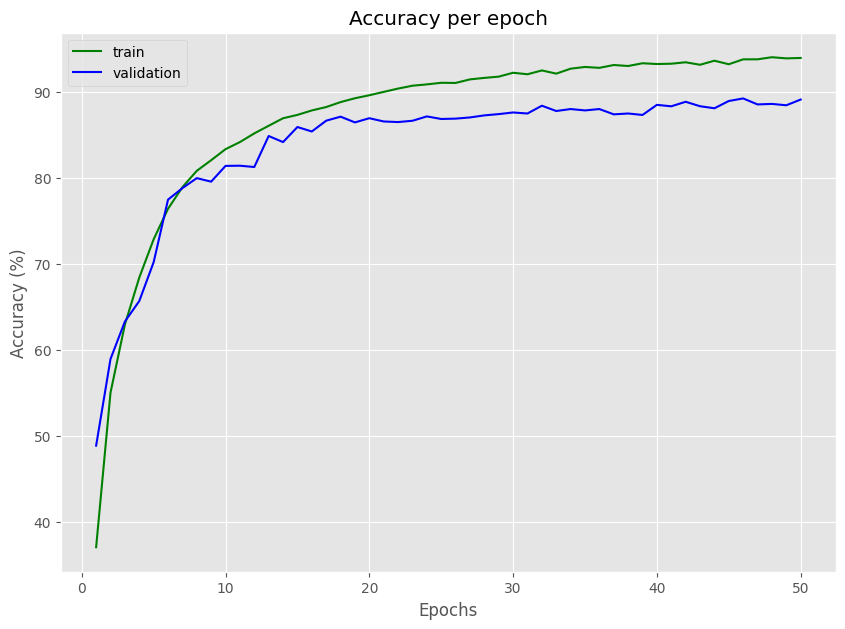

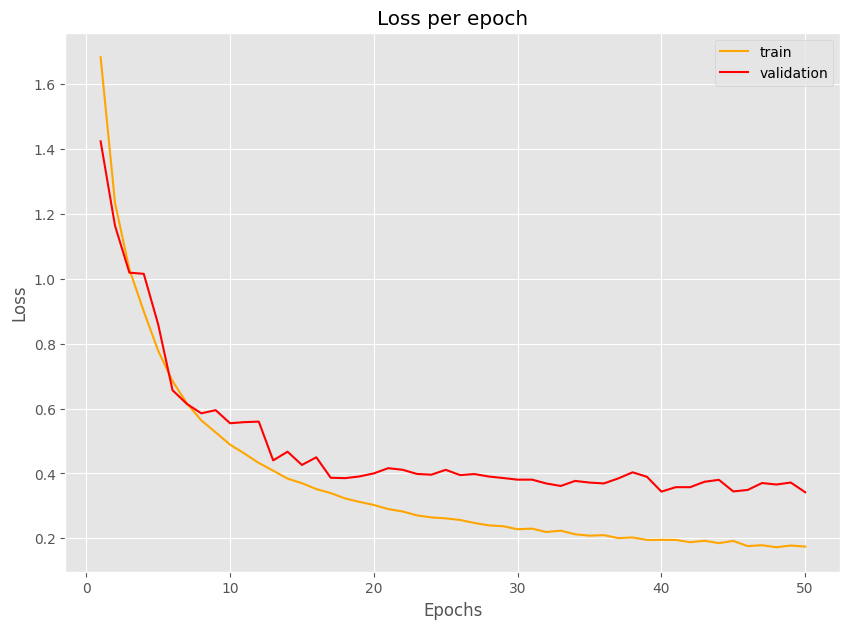

TRAINING FINISHED
CPU times: user 30min 53s, sys: 56.6 s, total: 31min 49s
Wall time: 41min 37s


In [ ]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet18_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_13hj')

In [ ]:
!python test.py --num_classes 10 --cp_datetime '20240130_143435' --optim_code '_13hj' --model_name 'resnet18_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cuda

Random seed 42 has been set.
Device: cuda

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    └─BasicBlock (0)                    [64, 64, 32, 32]     [64, 64, 32, 32]     --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32,

## Train custom ResNet50

In [7]:
# Hyperparameters (optim_code: _1359)
epochs = 20
l2 = 0.0001 # L2-norm for weight regularization (weight decay)
grad_clip = 0.1

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), # p=0.5 by default, which means there's a 50% chance that the image will be horizontally flipped
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train),
])

In [8]:
# Specify model
model = models.get_model('resnet50_custom', batch_size, num_classes)
model = move_to_device(model, device)

# Instantiate the loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
lr_scheduler = None

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    └─Bottleneck (0)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 32]     4,096                True
│    │    └─BatchNorm2d (bn1)            [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
│    │    └─Conv2d (conv2)               [64, 64, 32, 32]     [64, 64, 32, 32]     36,864               True
│    │    └─Ba

Random seed 42 has been set.
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Epoch: 001/020 | Batch 001/625 | Loss: 2.3983
Epoch: 001/020 | Batch 121/625 | Loss: 2.1754
Epoch: 001/020 | Batch 241/625 | Loss: 1.9183
Epoch: 001/020 | Batch 361/625 | Loss: 1.8313
Epoch: 001/020 | Batch 481/625 | Loss: 1.6720
Epoch: 001/020 | Batch 601/625 | Loss: 1.6589
Epoch: 001/020   Train Loss: 1.8998 | Train Acc.: 29.20% | Validation Loss: 1.6343 | Validation Acc.: 37.47%
Validation loss decreased (inf --> 1.6343).  Saving model for epoch 1...
--------------------------------------------------
Epoch: 002/020 | Batch 001/625 | Loss: 1.6089
Epoch: 002/020 | Batch 121/625 | Loss: 1.5361
Epoch: 002/020 | Batch 241/625 | Loss: 1.5486
Epoch: 002/020 | Batch 361/625 | Loss: 1.2844
Epoch: 002/020 | Batch 481/625 | Loss: 1.4852
Epoch: 002/020 | Batch 601/625 | Loss: 1.2504
Epoch: 002/020   Train Loss: 1.3746 | Train Acc.: 49.07% | Validation Loss: 1.286

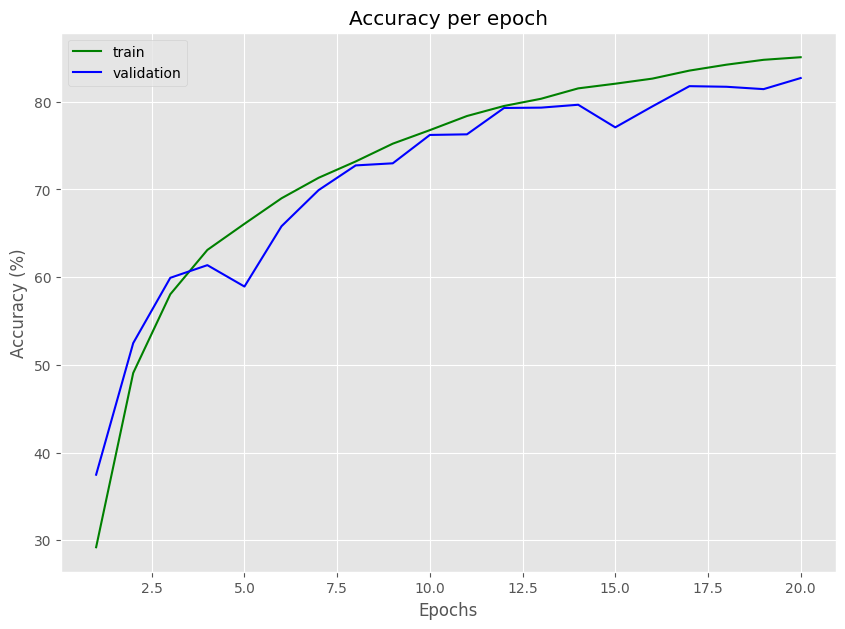

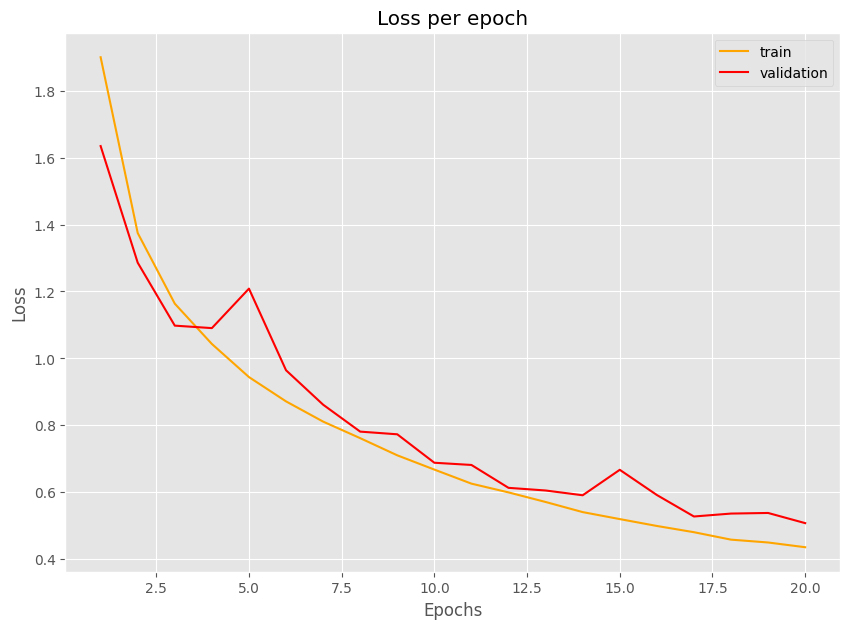

TRAINING FINISHED
CPU times: user 48min 27s, sys: 31 s, total: 48min 58s
Wall time: 52min 19s


In [9]:
%%time
from train import train

train(num_classes=num_classes, model=model, model_name='resnet50_custom',
      batch_size=batch_size, num_workers=num_workers, epochs=epochs,
      lr_scheduler=lr_scheduler,
      loss_func=loss_func, optimizer=optimizer, grad_clip=grad_clip,
      train_transform=train_transform, test_transform=test_transform,
      optim_code='_1359')


In [7]:
!python test.py --num_classes 10 --cp_datetime '20240224_230358' --optim_code '_1359' --model_name 'resnet50_custom' --batch_size 64 --num_workers 2

Random seed 42 has been set.
Device: cpu

Random seed 42 has been set.
Device: cpu

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Random seed 42 has been set.
Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [64, 3, 32, 32]      [64, 10]             --                   True
├─Conv2d (conv1)                         [64, 3, 32, 32]      [64, 64, 32, 32]     1,728                True
├─BatchNorm2d (bn1)                      [64, 64, 32, 32]     [64, 64, 32, 32]     128                  True
├─Sequential (layer1)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    └─Bottleneck (0)                    [64, 64, 32, 32]     [64, 256, 32, 32]    --                   True
│    │    └─Conv2d (conv1)               [64, 64, 32, 32]     [64, 64, 32, 3